In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/maximillian/Desktop/求职/Machine Learning/PyTorch/PYTORCH_NOTEBOOKS/Data/NYCTaxiFares.csv")

In [3]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [4]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [5]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [6]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [7]:
df['dist_km'] = haversine_distance(df,'pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

In [8]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
pickup_datetime      120000 non-null object
fare_amount          120000 non-null float64
fare_class           120000 non-null int64
pickup_longitude     120000 non-null float64
pickup_latitude      120000 non-null float64
dropoff_longitude    120000 non-null float64
dropoff_latitude     120000 non-null float64
passenger_count      120000 non-null int64
dist_km              120000 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [10]:
# Transfer to datetime varialbe
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
pickup_datetime      120000 non-null datetime64[ns, UTC]
fare_amount          120000 non-null float64
fare_class           120000 non-null int64
pickup_longitude     120000 non-null float64
pickup_latitude      120000 non-null float64
dropoff_longitude    120000 non-null float64
dropoff_latitude     120000 non-null float64
passenger_count      120000 non-null int64
dist_km              120000 non-null float64
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [12]:
my_time = df['pickup_datetime'][0]

In [13]:
my_time.hour

8

In [14]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [15]:
# Adjust Time Zone
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)

In [16]:
df['Hour'] = df['EDTdate'].dt.hour

In [17]:
# Set AM and PM
df['AMorPM'] = np.where(df['Hour']<12,'am','pm')

In [18]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm


In [19]:
# Day of week
df['Weekday'] = df['EDTdate'].dt.strftime("%a")

In [20]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,Fri


In [21]:
# Catergorical values
cat_cols = ['Hour','AMorPM','Weekday']
# Continuous values
cont_cols = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','dist_km']

In [22]:
y_col = ['fare_amount']

In [23]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                               int64
AMorPM                            object
Weekday                           object
dtype: object

In [24]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [25]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [26]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [27]:
df['AMorPM'].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): [am, pm]

In [28]:
df['Weekday'].head()

0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: Weekday, dtype: category
Categories (7, object): [Fri, Mon, Sat, Sun, Thu, Tue, Wed]

In [29]:
df['AMorPM']

0         am
1         am
2         am
3         pm
4         pm
5         am
6         pm
7         am
8         am
9         pm
10        pm
11        pm
12        am
13        pm
14        am
15        pm
16        pm
17        am
18        pm
19        pm
20        am
21        am
22        am
23        pm
24        am
25        am
26        pm
27        pm
28        pm
29        pm
          ..
119970    am
119971    pm
119972    am
119973    pm
119974    am
119975    pm
119976    pm
119977    am
119978    pm
119979    am
119980    am
119981    am
119982    pm
119983    pm
119984    pm
119985    pm
119986    pm
119987    am
119988    am
119989    pm
119990    am
119991    pm
119992    am
119993    am
119994    pm
119995    am
119996    am
119997    pm
119998    am
119999    pm
Name: AMorPM, Length: 120000, dtype: category
Categories (2, object): [am, pm]

In [30]:
df['AMorPM'].cat.categories

Index(['am', 'pm'], dtype='object')

In [31]:
df['AMorPM'].cat.codes

0         0
1         0
2         0
3         1
4         1
5         0
6         1
7         0
8         0
9         1
10        1
11        1
12        0
13        1
14        0
15        1
16        1
17        0
18        1
19        1
20        0
21        0
22        0
23        1
24        0
25        0
26        1
27        1
28        1
29        1
         ..
119970    0
119971    1
119972    0
119973    1
119974    0
119975    1
119976    1
119977    0
119978    1
119979    0
119980    0
119981    0
119982    1
119983    1
119984    1
119985    1
119986    1
119987    0
119988    0
119989    1
119990    0
119991    1
119992    0
119993    0
119994    1
119995    0
119996    0
119997    1
119998    0
119999    1
Length: 120000, dtype: int8

In [32]:
# Transfer to numpy array
df['Weekday'].cat.codes.values

array([1, 2, 2, ..., 3, 5, 2], dtype=int8)

In [33]:
# Transfer to numpy array
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

In [34]:
hr

array([ 4, 11,  7, ..., 14,  4, 12], dtype=int8)

In [35]:
cats = np.stack([hr,ampm,wkdy],axis=1)

In [36]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [37]:
# One liner version of (transfering to numpy array + stack) for categorical variables
cats = np.stack([df[col].cat.codes.values for col in cat_cols], 1)

In [38]:
# Transfer to tensor
cats = torch.tensor(cats,dtype=torch.int64)

In [39]:
# One liner version of (transfering to numpy array + stack) for continuous variables
conts = np.stack([df[col].values for col in cont_cols],axis=1)

In [40]:
# Transfer to tensor
conts = torch.tensor(conts,dtype=torch.float)

In [41]:
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

In [42]:
torch.tensor(df[y_col].values,dtype=torch.float).reshape(-1,1)

tensor([[ 6.5000],
        [ 6.9000],
        [10.1000],
        ...,
        [12.5000],
        [ 4.9000],
        [ 5.3000]])

In [43]:
# Reshape & transfer y to tensor
y = torch.tensor(df[y_col].values,dtype=torch.float).reshape(-1,1)

In [44]:
cats.shape

torch.Size([120000, 3])

In [45]:
conts.shape

torch.Size([120000, 6])

In [46]:
y.shape

torch.Size([120000, 1])

In [47]:
# Category sizes
cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [48]:
cat_szs

[24, 2, 7]

In [49]:
emb_szs = [(size,min(50,(size+1)//2)) for size in cat_szs]             # min(50,...) is a rule of thumb

In [50]:
# Number of catergory & embedding size
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [51]:
cats

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        ...,
        [14,  1,  3],
        [ 4,  0,  5],
        [12,  1,  2]])

In [52]:
catz = cats[:2]

In [53]:
catz

tensor([[ 4,  0,  1],
        [11,  0,  2]])

In [54]:
[nn.Embedding(ni,nf) for ni,nf in emb_szs]

[Embedding(24, 12), Embedding(2, 1), Embedding(7, 4)]

In [55]:
selfembeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])

In [56]:
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [57]:
# Foward method (cats)
embeddingz = []

for i,e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))

In [67]:
selfembeds[0](catz[:,0])

tensor([[-0.0707,  0.2757,  0.1905, -1.9926, -0.6363, -0.9920,  0.7939, -2.1922,
         -0.1864, -0.2841,  0.9924,  0.3473],
        [ 0.3243,  0.9008,  0.6685,  1.4451, -1.0218,  0.3150, -0.0433,  0.9519,
          0.9263, -1.1828,  0.4752,  1.6769]], grad_fn=<EmbeddingBackward>)

In [78]:
embeddingz

[tensor([[-1.5159,  0.7241, -0.8828, -0.7101, -0.8939, -0.3712,  0.6962,  0.5723,
           0.6885, -0.3019, -0.8920,  1.2333],
         [ 0.7603, -1.8524,  0.6429,  1.9736, -0.1675,  1.3315,  0.6269,  1.2267,
          -0.4975, -0.0247,  0.0410, -0.0885]], grad_fn=<EmbeddingBackward>),
 tensor([[1.6734],
         [1.6734]], grad_fn=<EmbeddingBackward>),
 tensor([[-0.1047, -0.6691,  0.0461, -0.5613],
         [ 2.2658, -0.1606,  0.1380,  1.1115]], grad_fn=<EmbeddingBackward>)]

In [86]:
# Merge 3 2** tensors into 1 2*17 tensor
z = torch.cat(embeddingz,1)

In [87]:
z

tensor([[-1.5159,  0.7241, -0.8828, -0.7101, -0.8939, -0.3712,  0.6962,  0.5723,
          0.6885, -0.3019, -0.8920,  1.2333,  1.6734, -0.1047, -0.6691,  0.0461,
         -0.5613],
        [ 0.7603, -1.8524,  0.6429,  1.9736, -0.1675,  1.3315,  0.6269,  1.2267,
         -0.4975, -0.0247,  0.0410, -0.0885,  1.6734,  2.2658, -0.1606,  0.1380,
          1.1115]], grad_fn=<CatBackward>)

In [89]:
# Randomly turn off 40% neurons in order to prevent overfitting
selfembdrop = nn.Dropout(0.4)

In [90]:
z = selfembdrop(z)

In [91]:
z

tensor([[-2.5265,  0.0000, -1.4713, -1.1836, -1.4899, -0.6187,  1.1603,  0.9538,
          0.0000, -0.0000, -0.0000,  0.0000,  0.0000, -0.0000, -1.1151,  0.0000,
         -0.0000],
        [ 0.0000, -3.0873,  1.0714,  0.0000, -0.2792,  0.0000,  0.0000,  2.0445,
         -0.0000, -0.0412,  0.0000, -0.0000,  0.0000,  0.0000, -0.0000,  0.0000,
          1.8525]], grad_fn=<MulBackward0>)

In [96]:
class TabularModel(nn.Module):
    
    def __init__(self,emb_szs,n_cont,out_sz,layers,p=0.5):
        
        # layers = [200,100,50]               # Number of neurons for each layer
        
        super().__init__()
        
        self.embeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)                  # Normalize countinous data to save training time
        
        layerlist = []
        n_emb = sum([nf for ni,nf in emb_szs])                 # Number of embedded categorical features
        n_in = n_emb + n_cont                                  # Number of all inputs
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
            
        layerlist.append(nn.Linear(layers[-1],out_sz))         # Last layer
        
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self,x_cat,x_cont):
        embeddings = []
        
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
            
        x = torch.cat(embeddings,1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x,x_cont],1)             # Combine categorical and continuous features
        x = self.layers(x)                      # Output all layers
        return x

In [118]:
# Categorical features embedded size
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [119]:
# Continuous features number
conts.shape[1]

6

In [97]:
torch.manual_seed(33)
model = TabularModel(emb_szs,conts.shape[1],1,[200,100],p=0.4)

In [98]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [99]:
criterion = nn.MSELoss() # np.sqrt(MSE) --> RMSE
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [100]:
# Half the batch size to make it train faster
batch_size = 60000
test_size = int(batch_size*0.2)

In [101]:
# Data shuffled already by default
cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]

In [102]:
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [103]:
len(cat_train)

48000

In [104]:
len(con_train)

48000

In [105]:
len(cat_test)

12000

In [107]:
import time

start_time = time.time()

epochs = 300

losses = []

for i in range(epochs):
    i += 1
    
    y_pred = model(cat_train,con_train)
    loss = torch.sqrt(criterion(y_pred,y_train)) #RMSE
    losses.append(loss)
    
    if i%10 == 1:
        print(f'epoch: {i} loss is {loss}')
        
    optimizer.zero_grad()            # Clears old gradients from the last step
                                     # Otherwise the gradients will accumulate from all loss.backward() calls
        
    loss.backward()                  # Computes the derivative of the loss w.r.t. the parameters
                                     # (or anything requiring gradients) using backpropagation
        
    optimizer.step()                 # Causes the optimizer to take a step based on the gradients of the parameters
    
duration = time.time() - start_time
print(f'Training took {duration/60} minutes')

epoch: 1 loss is 12.500558853149414
epoch: 11 loss is 12.160984992980957
epoch: 21 loss is 11.738170623779297
epoch: 31 loss is 11.323526382446289
epoch: 41 loss is 10.903594970703125
epoch: 51 loss is 10.480284690856934
epoch: 61 loss is 10.078514099121094
epoch: 71 loss is 9.706098556518555
epoch: 81 loss is 9.366925239562988
epoch: 91 loss is 9.055984497070312
epoch: 101 loss is 8.731250762939453
epoch: 111 loss is 8.3931245803833
epoch: 121 loss is 8.016792297363281
epoch: 131 loss is 7.609452724456787
epoch: 141 loss is 7.187167644500732
epoch: 151 loss is 6.718194007873535
epoch: 161 loss is 6.239462375640869
epoch: 171 loss is 5.744356632232666
epoch: 181 loss is 5.258265972137451
epoch: 191 loss is 4.801071643829346
epoch: 201 loss is 4.361266136169434
epoch: 211 loss is 4.014414310455322
epoch: 221 loss is 3.7607553005218506
epoch: 231 loss is 3.6203649044036865
epoch: 241 loss is 3.523139715194702
epoch: 251 loss is 3.4908392429351807
epoch: 261 loss is 3.44431471824646
epoch

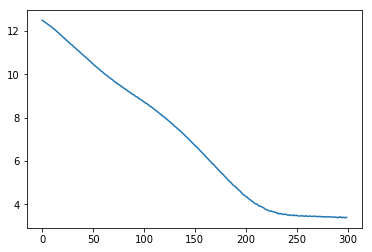

In [108]:
plt.plot(range(epochs),losses)

In [109]:
with torch.no_grad():       # No gradient because not need to edit bias and weight here
    
    y_val = model(cat_test,con_test)
    
    loss = torch.sqrt(criterion(y_val,y_test))

In [110]:
loss

tensor(3.3225)

In [112]:
for i in range(10):
    diff = np.abs(y_val[i].item()-y_test[i].item())
    print(f'{i}.) PREDICTED: {y_val[i].item():8.2f} TRUE: {y_test[i].item():8.2f} DIFF: {diff:8.2f}')
    
    # 8.2f is format code

0.) PREDICTED:     3.69 TRUE:     2.90 DIFF:     0.79
1.) PREDICTED:    25.56 TRUE:     5.70 DIFF:    19.86
2.) PREDICTED:     6.43 TRUE:     7.70 DIFF:     1.27
3.) PREDICTED:    13.35 TRUE:    12.50 DIFF:     0.85
4.) PREDICTED:     4.77 TRUE:     4.10 DIFF:     0.67
5.) PREDICTED:     5.39 TRUE:     5.30 DIFF:     0.09
6.) PREDICTED:     4.12 TRUE:     3.70 DIFF:     0.42
7.) PREDICTED:    17.78 TRUE:    14.50 DIFF:     3.28
8.) PREDICTED:     7.36 TRUE:     5.70 DIFF:     1.66
9.) PREDICTED:    11.49 TRUE:    10.10 DIFF:     1.39


In [113]:
torch.save(model.state_dict(),'TaxiModel.pt')